  ## Scenario
  
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Ask

The purpose of the analysis is to answer the question:
How do annual members and casual riders use Cyclistic bikes differently?

The insight will help create a marketing strategy that will impact the financial results of the company. 

Our main stakeholders are the director of marketing - Lily Moreno, and the executive team who will make the decision about the project.

## Data structure

Data has been download from "https://divvy-tripdata.s3.amazonaws.com/index.html". This is public data that can be used to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit you from using riders’ personally identifiable information. This means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes. 
Data are from the last 12 months. There are 12 files. Each of them represents a separate month.

Metadata for Trips Table:

Variables:

* ride_id: ID attached to each trip taken
* started_at: day and time trip started, in CST
* ended_at: day and time trip ended, in CST
* start_station_name: name of station where trip originated
* end_station_name: name of station where trip terminated 
* start_station_id: ID of station where trip originated
* end_station_id: ID of station where trip terminated
* member_casual: "Casual" is a rider who purchased a 24-Hour Pass; "Member" is a rider who purchased an Annual Membership


Notes:

* First row contains column names
* Trips that did not include a start or end date were removed from original table.
* Gender and birthday are only available for Subscribers

## Data preparation

Steps to be taken before analysis phase: 

1. Imports
2. Ensured data’s integrity - check the structure of the files. 
3. Union files into one data frame. 
4. Upload the dataset
5. Change type for "started_at"; "ended_at"
6. Column to add:
    * ride_length: calculate the length of each ride by subtracting the column
    * started_at: from the column “ended_at” and change the format
    * year: show year from 'started_at'
    * month: show month from 'started_at'
    * day: show day from 'started_at'

### 1. Imports

In [1]:
import os
import glob
import pandas as pd 
import numpy as np
from datetime import *
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Ensured data’s integrity - check the structure of the files

In [2]:
# import random two files
file1Path = "E:\\DataAnalysis\\001 Cyclistic bike-share - R markdown\\Data\\Last24MonthsCSV\\202011-divvy-tripdata.csv"
file2Path = "E:\\DataAnalysis\\001 Cyclistic bike-share - R markdown\\Data\\Last24MonthsCSV\\202109-divvy-tripdata.csv"
file1 = pd.read_csv(file1Path)
file2 = pd.read_csv(file2Path)

In [3]:
# check the file structure
filesShape = [file1.shape, file1.columns, file1.info(), file2.shape, file2.columns, file2.info()]
filesShape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259716 entries, 0 to 259715
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             259716 non-null  object 
 1   rideable_type       259716 non-null  object 
 2   started_at          259716 non-null  object 
 3   ended_at            259716 non-null  object 
 4   start_station_name  235392 non-null  object 
 5   start_station_id    235282 non-null  float64
 6   end_station_name    232967 non-null  object 
 7   end_station_id      232890 non-null  float64
 8   start_lat           259716 non-null  float64
 9   start_lng           259716 non-null  float64
 10  end_lat             259432 non-null  float64
 11  end_lng             259432 non-null  float64
 12  member_casual       259716 non-null  object 
dtypes: float64(6), object(7)
memory usage: 25.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756147 entries, 0 to 756146
Data col

[(259716, 13),
 Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
        'start_station_name', 'start_station_id', 'end_station_name',
        'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
        'member_casual'],
       dtype='object'),
 None,
 (756147, 13),
 Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
        'start_station_name', 'start_station_id', 'end_station_name',
        'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
        'member_casual'],
       dtype='object'),
 None]

### Output:
- the number of columns matches
- number of rows is ok
- the need to standardize types 

### 3. Union files into one data frame

In [4]:
# loop via all files in given folder
os.chdir("E:\\DataAnalysis\\001 Cyclistic bike-share - R markdown\\Data\\Last24MonthsCSV")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

# combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

# export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

### 4. Upload the dataset

In [5]:
# read the file and set up types
datasetPath = "E:\\DataAnalysis\\001 Cyclistic bike-share - R markdown\\Data\\Last24MonthsCSV\\combined_csv.csv"
dataset = pd.read_csv(datasetPath, dtype = {'ride_id': str, 'rideable_type': str, 'started_at': str, 'ended_at': str,
                                                   'start_station_name': str, 'start_station_id': str, 
                                                   'end_station_name': str, 'end_station_id': str, 
                                                   'start_lat': np.float64, 'start_lng': np.float64, 'end_lat': np.float64, 
                                                   'end_lng': np.float64, 'member_casual': str})

In [6]:
# create the copy 
df = dataset.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378834 entries, 0 to 5378833
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 533.5+ MB


### 5. Change type to date for "started_at"; "ended_at"

In [8]:
# change type to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# check the changes
df[['started_at', 'ended_at']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378834 entries, 0 to 5378833
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   started_at  datetime64[ns]
 1   ended_at    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 82.1 MB


In [9]:
df[['started_at', 'ended_at']].describe()

,started_at,ended_at
count,5378834,5378834
unique,4487412,4479067
top,2020-11-07 14:24:58,2021-09-16 08:39:10
freq,9,17
first,2020-11-01 00:00:08,2020-11-01 00:02:20
last,2021-10-31 23:59:49,2021-11-03 21:45:48


### 6. Column to add - 'ride_length'

In [10]:
# ride_length: calculate the length of each ride by subtracting the column 'started_at' from 'ended_at'
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60.0

In [11]:
# show min, max, number of rows where 'ride_length' < 0 (anomalies), rows where 'ride_length' > 1000 (outliers)
stats = {
        'min': int(df['ride_length'].min()),
        'max': df['ride_length'].max(),
        'count_less_0': df['ride_length'].loc[df['ride_length'] < 0 ].count(),
        'count_more_1000': df['ride_length'].loc[df['ride_length'] > 1000 ].count(),
        'count_Nan_ended_at': df['ended_at'].isna().sum(),
        'count_Nan_started_at': df['started_at'].isna().sum(),
        'total_rows': df.shape[0]}
dStats = pd.DataFrame(list(stats.items()))
dStats

,0,1
0,min,-29049.00
1,max,55944.15
2,count_less_0,1393.00
3,count_more_1000,5392.00
4,count_Nan_ended_at,0.00
5,count_Nan_started_at,0.00
6,total_rows,5378834.00


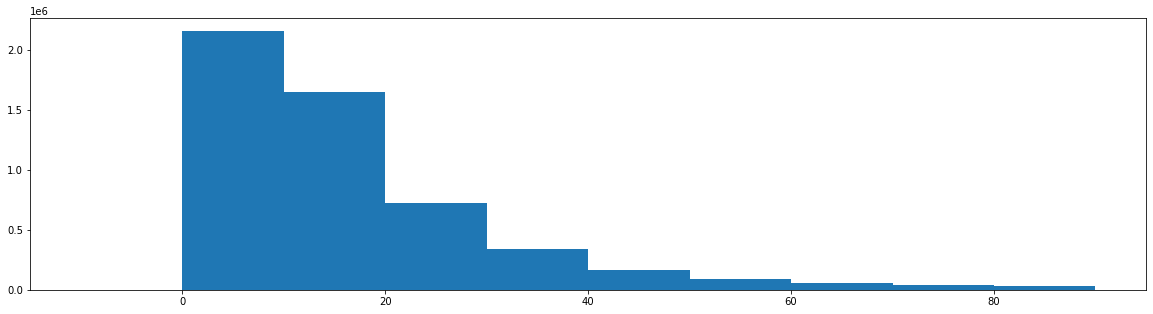

In [12]:
# create list of int from 10 to 90 step 10
start = -10
stop = 100
step = 10
bins_list = list(range(start, stop, step))

# create histogram
plt.figure(figsize=(20, 5))
plt.hist(df['ride_length'], bins=bins_list);

### Output:
- no Nan values for Start_at and End_at date
- number of items where ride_lenght is < 0 minutes. Anomalies --> data to be removed
- number of observations where ride_lenght is > 1000 minutes. Outliers --> data to be removed 

### 7. Column to add - 'day_of_week'

In [13]:
# create new column with day name
df['day_of_week'] = df['started_at'].dt.day_name()

# set up the 'sorter'. Each day will have number from 1 to 7
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(1,len(sorter)+1)))

# group items by 'day_of_week' 
dfGrouped = pd.DataFrame(df.groupby(['day_of_week']).count()['ride_id'])

# reset index
dfGrouped = dfGrouped.reset_index()

# create column representing numbers for each weekday
dfGrouped['day_of_week_m'] = dfGrouped['day_of_week'].map(sorterIndex)

# rewrite day_of_week to include numbers at the begging to help sorting later on
dfGrouped['day_of_week'] = dfGrouped['day_of_week_m'].astype(str) + ' ' + dfGrouped['day_of_week']

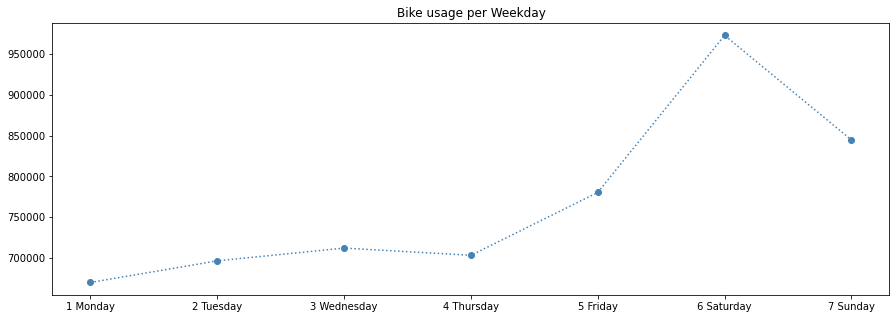

In [14]:
# plot the results
plt.figure(figsize=(15,5))
dfGrouped.groupby(['day_of_week']).sum()['ride_id'].plot(linestyle=':', marker='o', color='steelblue')
plt.title('Bike usage per Weekday')
plt.xlabel("")
plt.show()

### Output:
- bikes are rented mainly on weekends
- for analysis, we have to divide it into casual/member clients

### 8. Column to add - 'day', 'month', 'year'

In [15]:
df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['day'] = df['started_at'].dt.day

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378834 entries, 0 to 5378833
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
 14  day_of_week         object        
 15  year                int64         
 16  month               int64         
 17  day                 int64         
dtypes: datetime64[ns](2), float64(5), int64(3), object(8)
memory usage: 738.7+ MB


## Analyze

In [17]:
# narrow the dataset (remove negative ride_length, outliers and station == HQ QR)
df_final = df.loc[(df['ride_length'] >= 0) & 
                  (df['ride_length'] < 1000) & 
                  (df['start_station_name'] != 'HQ QR')]

In [18]:
# min, max, mean and median, count and sum for casual and member users
pd.options.display.float_format = '{:,.2f}'.format
df_final.groupby('member_casual').agg({'ride_length': ['min', 'max', 'mean', 'median', 'count', 'sum']})

ride_length                                           
                      min    max  mean median    count           sum
member_casual                                                       
casual               0.00 999.93 26.81  16.33  2465490 66,098,790.63
member               0.00 998.78 13.65   9.90  2906559 39,665,009.88

In [19]:
# create two dataset for causal and member clients
casual = df_final.loc[df_final['member_casual'] == 'casual']['ride_length']
member = df_final.loc[df_final['member_casual'] == 'member']['ride_length']

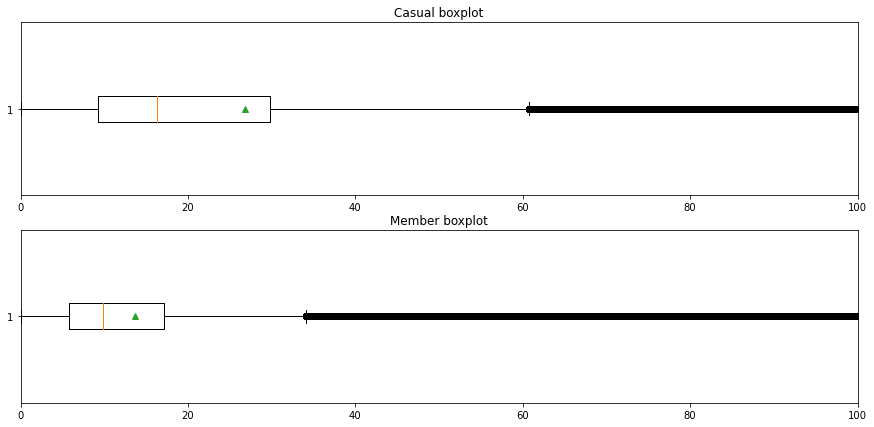

In [20]:
# draw boxplot for casual and member clients, change scale zoom in boxplot
fig, axs = plt.subplots(2, figsize=(15,7))
axs[0].boxplot(casual, vert = 0, showmeans=True)
axs[0].set_title('Casual boxplot')
axs[0].set_xlim([0, 100])
axs[1].boxplot(member, vert = 0, showmeans=True)
axs[1].set_title('Member boxplot')
axs[1].set_xlim([0, 100])
plt.show()

In [21]:
# add column with month and year only as a datatime (needed for grouping)
df_final['started_at_MY'] = pd.to_datetime(df_final['started_at']).dt.strftime('%m-%y')

<ipython-input-21-705163e49e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['started_at_MY'] = pd.to_datetime(df_final['started_at']).dt.strftime('%m-%y')


In [22]:
# group data by member_casual and started_at_MY with the count and sum of ride_lenght
# this is needed to plot the graph
dfGrouped_date = df_final.groupby(['member_casual', 'started_at_MY'])['ride_length'].sum().reset_index()
dfGrouped_date = dfGrouped_date.rename({'ride_length': 'ride_length_sum'}, axis = 1)
dfGrouped_date['ride_length_count'] = df_final.groupby(['member_casual', 'started_at_MY'])['ride_length'].count().reset_index()['ride_length']
dfGrouped_date_x = dfGrouped_date['started_at_MY'].unique()

In [23]:
# group data by member_casual and day_of_week with the count and sum of ride_lenght
# this is needed to plot the graph
dfGrouped_weekday = df_final.groupby(['member_casual', 'day_of_week'])['ride_length'].sum().reset_index()
dfGrouped_weekday = dfGrouped_weekday.rename({'ride_length': 'ride_length_sum'}, axis = 1)
dfGrouped_weekday['ride_length_count'] = df_final.groupby(['member_casual', 'day_of_week'])['ride_length'].count().reset_index()['ride_length']
dfGrouped_weekday['day_of_week'] = pd.Categorical(dfGrouped_weekday['day_of_week'],
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                   ordered=True)

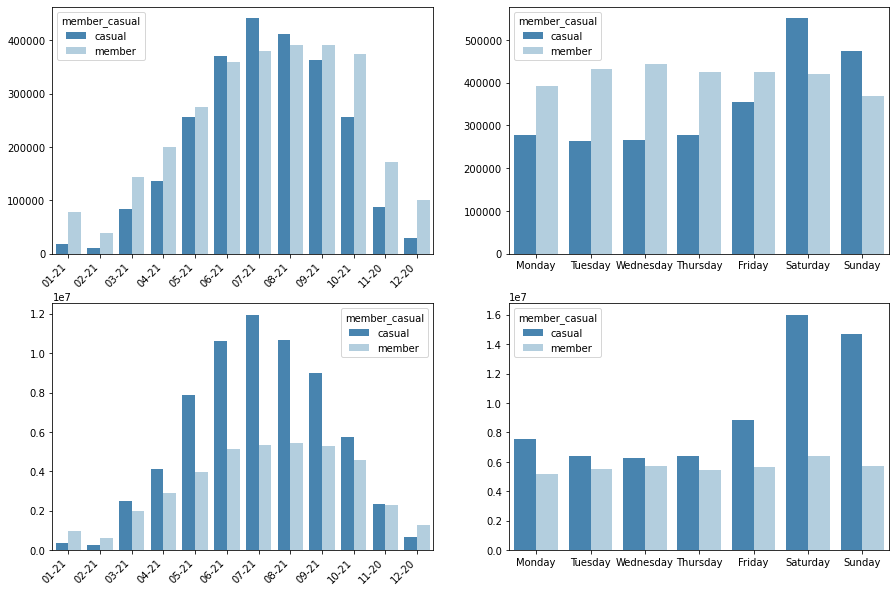

In [24]:
# show the graphs 

# count of rides per member split by months
fig, ax = pyplot.subplots(2, 2, figsize=(15,10))
sns.barplot(data = dfGrouped_date, 
                  x ='started_at_MY',
                  y = 'ride_length_count',
                  hue = 'member_casual',
                  palette = 'Blues_r',
                  ax = ax[0, 0])

ax[0,0].set_xticklabels(labels = dfGrouped_date_x, rotation=45, ha='right')
ax[0,0].set(xlabel=None)
ax[0,0].set(ylabel=None)

# time lenght per member split by months
sns.barplot(data = dfGrouped_date, 
                  x ='started_at_MY',
                  y = 'ride_length_sum',
                  hue = 'member_casual',
                  palette = 'Blues_r',
                  ax = ax[1,0])

ax[1,0].set_xticklabels(labels = dfGrouped_date_x, rotation=45, ha='right')
ax[1,0].set(xlabel=None)
ax[1,0].set(ylabel=None)

# count of rides per member split by weekday
sns.barplot(data = dfGrouped_weekday, 
                  x ='day_of_week',
                  y = 'ride_length_count',
                  hue = 'member_casual',
                  palette = 'Blues_r',
                  ax = ax[0, 1])

ax[0,1].set(xlabel=None)
ax[0,1].set(ylabel=None)

# time lenght per member split by weekday
sns.barplot(data = dfGrouped_weekday, 
                  x ='day_of_week',
                  y = 'ride_length_sum',
                  hue = 'member_casual',
                  palette = 'Blues_r',
                  ax = ax[1, 1])

ax[1,1].set(xlabel=None)
ax[1,1].set(ylabel=None)

plt.show()

## Summary

- Member clients using bikes for shorter time, however, they are using them more often. 
- Casual clients using bikes for longer time (20% more than members) but less often.

## Recommendation

- to get the stable revenue for the whole year we should start the marketing campain to move casual clients to be a members